In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilies

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable 
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable      
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [4]:
#from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
#from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
#from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)   
    

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness = 1, circle_radius = 1),
                             mp_drawing.DrawingSpec(color=(256,256,256), thickness = 1, circle_radius = 1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 2))

In [11]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        #Read feed
        ret, frame = cap.read()

        #Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        
        #Show to screen
        cv2.imshow("OpenCV Feed", image)

        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
len(results.right_hand_landmarks.landmark)

21

In [13]:
draw_landmarks(frame, results)

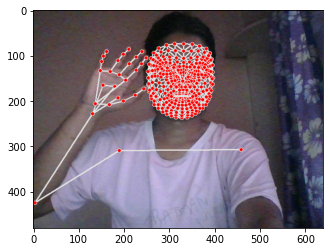

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoints


In [15]:
results.pose_landmarks.landmark

[x: 0.5168129801750183
y: 0.3262206017971039
z: -0.8651442527770996
visibility: 0.9999338984489441
, x: 0.541999876499176
y: 0.261409729719162
z: -0.805615246295929
visibility: 0.9998515844345093
, x: 0.5570176839828491
y: 0.2610682249069214
z: -0.8053842782974243
visibility: 0.999799907207489
, x: 0.5712195634841919
y: 0.2626689672470093
z: -0.8056557774543762
visibility: 0.9998266100883484
, x: 0.48472967743873596
y: 0.26427796483039856
z: -0.7905327677726746
visibility: 0.9998735785484314
, x: 0.46392542123794556
y: 0.26561346650123596
z: -0.7901517748832703
visibility: 0.9998536109924316
, x: 0.44400280714035034
y: 0.26912394165992737
z: -0.7902263402938843
visibility: 0.9998953342437744
, x: 0.5944591760635376
y: 0.2988188564777374
z: -0.41802412271499634
visibility: 0.9997643232345581
, x: 0.4211115837097168
y: 0.3035161793231964
z: -0.3328651189804077
visibility: 0.9998879432678223
, x: 0.5502955913543701
y: 0.39686477184295654
z: -0.7281425595283508
visibility: 0.99991130828857

In [16]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
len(results.face_landmarks.landmark)

468

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
pose

array([ 5.16812980e-01,  3.26220602e-01, -8.65144253e-01,  9.99933898e-01,
        5.41999876e-01,  2.61409730e-01, -8.05615246e-01,  9.99851584e-01,
        5.57017684e-01,  2.61068225e-01, -8.05384278e-01,  9.99799907e-01,
        5.71219563e-01,  2.62668967e-01, -8.05655777e-01,  9.99826610e-01,
        4.84729677e-01,  2.64277965e-01, -7.90532768e-01,  9.99873579e-01,
        4.63925421e-01,  2.65613467e-01, -7.90151775e-01,  9.99853611e-01,
        4.44002807e-01,  2.69123942e-01, -7.90226340e-01,  9.99895334e-01,
        5.94459176e-01,  2.98818856e-01, -4.18024123e-01,  9.99764323e-01,
        4.21111584e-01,  3.03516179e-01, -3.32865119e-01,  9.99887943e-01,
        5.50295591e-01,  3.96864772e-01, -7.28142560e-01,  9.99911308e-01,
        4.77617890e-01,  3.96549404e-01, -7.05070734e-01,  9.99939144e-01,
        7.17976987e-01,  6.40235186e-01, -2.39539176e-01,  9.99053538e-01,
        2.97145814e-01,  6.44723833e-01, -1.63396791e-01,  9.99579906e-01,
        8.17970634e-01,  

In [20]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [21]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
rh

array([ 2.15188950e-01,  4.29763705e-01,  4.13183045e-07,  2.63434023e-01,
        4.35111284e-01, -2.21909322e-02,  3.12481165e-01,  4.17017519e-01,
       -3.07228062e-02,  3.52862597e-01,  3.91097397e-01, -3.78104970e-02,
        3.82737577e-01,  3.61959189e-01, -4.44582216e-02,  3.19971472e-01,
        3.22660267e-01, -9.40511189e-03,  3.55556369e-01,  2.77012020e-01,
       -2.14695092e-02,  3.74293774e-01,  2.46618867e-01, -3.27846222e-02,
        3.89638990e-01,  2.19992399e-01, -4.07996476e-02,  2.96997458e-01,
        2.96434343e-01, -8.74564331e-03,  3.32760870e-01,  2.46296808e-01,
       -1.74755659e-02,  3.55552673e-01,  2.14879841e-01, -2.82200612e-02,
        3.75404507e-01,  1.90884560e-01, -3.63899283e-02,  2.67150134e-01,
        2.82411337e-01, -1.16368309e-02,  2.92765349e-01,  2.32634872e-01,
       -2.09998600e-02,  3.11465383e-01,  2.03005522e-01, -2.98570916e-02,
        3.30607265e-01,  1.80937454e-01, -3.67016383e-02,  2.31885448e-01,
        2.78222263e-01, -

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
extract_keypoints(results).shape

(1662,)

# Setup Folder for Collection

In [ ]:
#Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data')

#Action to detect
actions = np.array(['A', 'B', 'C'])

#no_sequence worth of videos
no_sequences = 10

#Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 40


In [ ]:
for action in actions: 
    for sequence in range(start_folder, no_sequences+start_folder):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collecting Data



In [ ]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    #Loop through actions
    for action in actions:
        #Loop through sequence aka videos
        for sequence in range(start_folder, no_sequences+start_folder):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                #Read feed
                ret, frame = cap.read()

                #Make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #Draw landmarks
                draw_styled_landmarks(image, results)

                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 225, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frame for {} Video Number {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 225), 2, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frame for {} Video Number {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 225), 2, cv2.LINE_AA)

                #Show to screen
                cv2.imshow("OpenCV Feed", image)

                #Extract Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
npy_path = os.path.join(DATA_PATH, action, str(0), str(0))

In [ ]:
img_array = np.load('Data/hello/0/0.npy')

In [ ]:
img_array